# Estandarización, covarianza y correlación

## Estandarizar

La correlacion y la covarianza, son dos medidas que nos van a permitir entender la relacion entre dos variables aleatorias, **x** y **y**. Pero para hablar de ellas debemos entender el concepto de estandarizacion.


Estandarizar una variable consiste en transformar una distribución N(µ, σ) en otra normal N(0, 1). La transformación consiste en:

1. Trasladar o centrar, es decir, hacer la media cero (µ = 0).
2. Reducir (contraer o dilatar), es decir, hacer la desviación estandar o típica uno (σ = 1).

Para ellos se aplica el cambio de variable: 

Z = (X - µ) / σ

El proceso lo podemos ver en la imagen: 


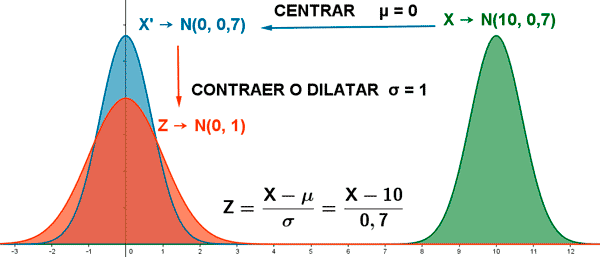

Estandarizar tambien nos permite hacer que la variable sea adimensional, es decir, que no tengan dimensión o que los datos sean independientes de la escala escogida. 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df_iris = pd.read_csv('../data/iris.csv')
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
df_iris.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [4]:
df_iris.variety.value_counts()

variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

Nos quedaremos con el largo del petalo

In [5]:
y_largo_petalo = df_iris['petal.length']

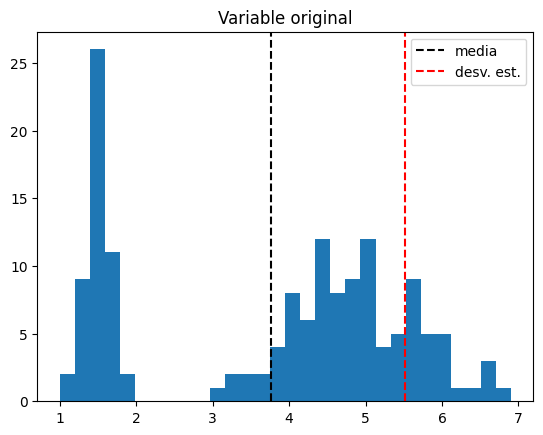

In [6]:
fig, ax = plt.subplots()
ax.set_title('Variable original')
ax.hist(y_largo_petalo, bins = 30)
ax.axvline(x = np.mean(y_largo_petalo), color='black', label='media', linestyle='--')
ax.axvline(x = np.mean(y_largo_petalo) + np.std(y_largo_petalo), color='red', label='desv. est.', linestyle='--')
ax.legend()

Es una distribucion bimodal, esto nos da un vistazo que la variable esta categorizando dos poblaciones diferentes.

Luego de haber hecho la grafica anterior, estandaricemos:



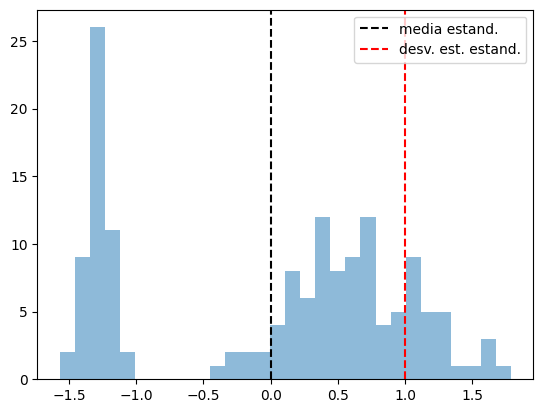

In [7]:
fig, ax = plt.subplots()
# cambio de variable para estandarizar
z = (y_largo_petalo - np.mean(y_largo_petalo)) / np.std(y_largo_petalo)

# Estandarizado
ax.hist(z, bins = 30, alpha = 0.5)
ax.axvline(x = np.mean(z), color='black', label='media estand.', linestyle='--')
ax.axvline(x = np.mean(z) + np.std(z), color='red', label='desv. est. estand.', linestyle='--')

ax.legend()

Comparemos la original y la estandarizada. 

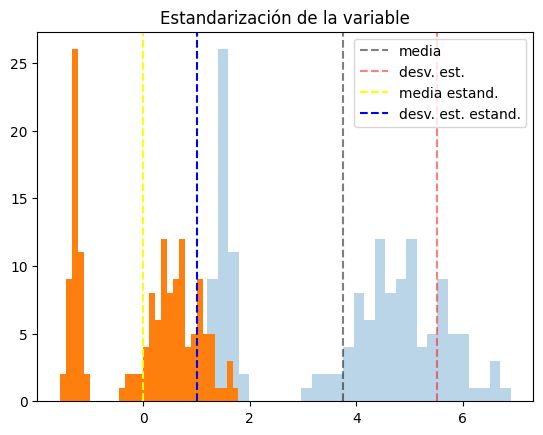

In [ ]:
fig, ax = plt.subplots()
# cambio de variable para estandarizar
z = (y_largo_petalo - np.mean(y_largo_petalo)) / np.std(y_largo_petalo)


ax.set_title('Estandarización de la variable')
# Original
ax.hist(y_largo_petalo, bins = 30, alpha = 0.3)
ax.axvline(x = np.mean(y_largo_petalo), color='black', label='media', linestyle='--', alpha = 0.5)
ax.axvline(x = np.mean(y_largo_petalo) + np.std(y_largo_petalo), color='red', label='desv. est.', linestyle='--', alpha = 0.5)

# Estandarizado
ax.hist(z, bins = 30)
ax.axvline(x = np.mean(z), color='black', label='media estand.', linestyle='--')
ax.axvline(x = np.mean(z) + np.std(z), color='red', label='desv. est. estand.', linestyle='--')

ax.legend()

## Covarianza y correlación

Ambas miden el valor de la relación lineal entre dos variables aleatorias X e Y. 

[Covarianza](https://es.wikipedia.org/wiki/Covarianza)
- Mide la dirección (signo) de la relación entre X e Y. 
- Sirve para magnitudes no estandarizadas. 
- El rango de la covarianza es Con(X) = [-∞, ∞].

[Correlación](https://es.wikipedia.org/wiki/Correlaci%C3%B3n):
- Mide la dirección (signo) de la relación entre X e Y.
- Mide la fuerza (cuando está estandarizada). 
- El rango de la correlación es Corr(X) = [-1, 1].
- Relación lineal perfecta cuando es -1 o 1.

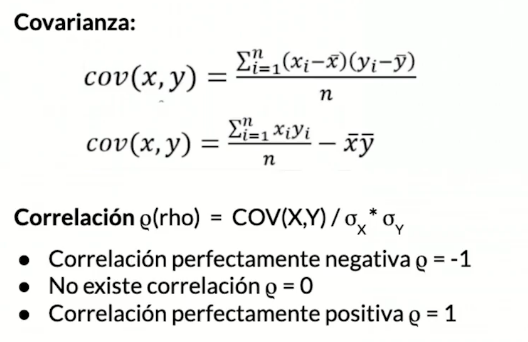

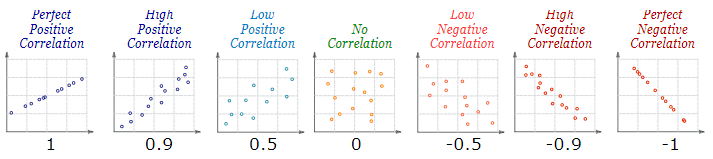

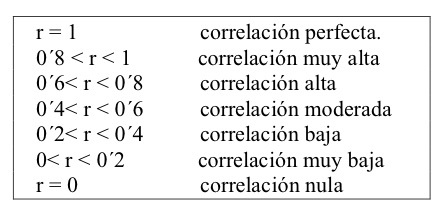

Veamos ahora la relación entre dos variables, estas son: 
- largo de petalo
- largo de sepalo

In [ ]:
df_iris.columns

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = df_iris['petal.length'], y = df_iris['sepal.length'], alpha=0.7)
ax.set_xlabel('petal.length')
ax.set_ylabel('sepal.length')


Veamos la covarianza:

In [ ]:
np.cov(df_iris['petal.length'], df_iris['sepal.length'])

La relación puntual de las dos variables son las esquinas inferior izquierda y superior derecha.

Sabemos que la relación es positiva, y como vimos en el gráfico, efectivamente es asi, tenemos una relación positiva de una variable respesto a la otra. Si una aumenta la otra tambien, pero no tenemos la fuerza de estas variables. Esto último lo obtenemos con la correlación. Tenemos varios tipos de correlación, estudiaremos 2.  

[Coeficiente de correlación de Spearman](https://es.qwe.wiki/wiki/Spearman%27s_rank_correlation_coefficient) evalúa las relaciones monótonas (lineales o no).

In [ ]:
df_iris.corr(method = 'spearman', numeric_only=True)

Vemoas que tiene una correlación de spearman de 0.88 entre largo del petalo y largo de sepalo

[Coeficiente de correlación de Pearson](https://es.qwe.wiki/wiki/Pearson_correlation_coefficient) evalúa las relaciones lineales.

In [ ]:
df_iris.corr(method = 'pearson', numeric_only=True)

Vemoas que tiene una correlación de spearman de 0.87 entre largo del petalo y largo de sepalo

Comparación entre coeficiente de Searman y Pearson:

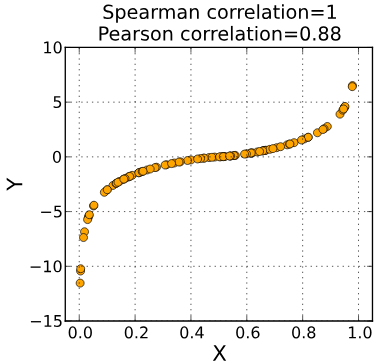

Se obtiene una correlación de Spearman de 1 cuando las dos variables que se comparan están relacionadas monótonamente, incluso si su relación no es lineal. Esto significa que todos los puntos de datos con valores de x mayores que los de un punto de datos dado también tendrán valores de y mayores. Por el contrario, esto no da una correlación de Pearson perfecta.

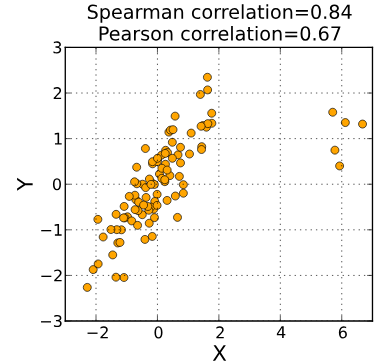

La correlación de Spearman es menos sensible que la correlación de Pearson a valores atípicos fuertes que se encuentran en las colas de ambas muestras. Esto se debe a que la rho de Spearman limita el valor atípico al valor de su rango.

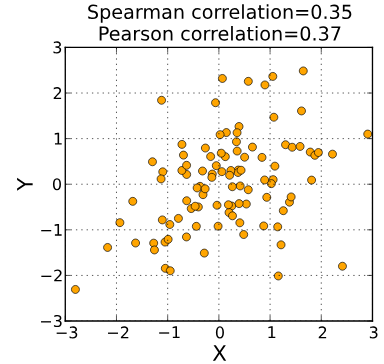

Cuando los datos están distribuidos aproximadamente elípticamente y no hay valores atípicos prominentes, la correlación de Spearman y la correlación de Pearson dan valores similares.

[El coeficiente de correlación de rango de Kendall](https://es.wikipedia.org/wiki/Coeficiente_de_correlaci%C3%B3n_de_rango_de_Kendall), comúnmente conocido como coeficiente τ de Kendall (con la letra griega τ, tau), es una estadística utilizada para medir la asociación ordinal entre dos cantidades medidas. Se usa como estadística de prueba en una prueba de hipótesis estadística para establecer si dos variables pueden considerarse como dependientes estadísticamente.

In [ ]:
df_iris.corr(method = 'kendall', numeric_only=True)

## Heatmap de las correlaciones

In [ ]:
corr_spearman = df_iris.corr(method = 'spearman', numeric_only=True)
corr_pearson = df_iris.corr(method = 'pearson', numeric_only=True)
corr_kendall = df_iris.corr(method = 'kendall', numeric_only=True)

In [ ]:
# Spearman
current_corr = corr_spearman # Guardo el tipo de correlacion
mask = np.zeros_like(current_corr, dtype = np.bool)
mask[np.triu_indices(len(current_corr), 1)] = True

sns.heatmap(current_corr, xticklabels=current_corr.columns, yticklabels=current_corr.columns,
            vmin = -1, vmax = 1, cmap='Spectral', annot=True, mask = mask)

In [ ]:
# Pearson
current_corr = corr_pearson # Guardo el tipo de correlacion
mask = np.zeros_like(current_corr, dtype = np.bool)
mask[np.triu_indices(len(current_corr), 1)] = True

sns.heatmap(current_corr, xticklabels=current_corr.columns, yticklabels=current_corr.columns,
            vmin = -1, vmax = 1, cmap='Spectral', annot=True, mask = mask)

In [ ]:
# Kendall
current_corr = corr_kendall # Guardo el tipo de correlacion
mask = np.zeros_like(current_corr, dtype = np.bool)
mask[np.triu_indices(len(current_corr), 1)] = True

sns.heatmap(current_corr, xticklabels=current_corr.columns, yticklabels=current_corr.columns,
            vmin = -1, vmax = 1, cmap='Spectral', annot=True, mask = mask)

## Correlación y causalidad

La dicotomía entre correlación y causalidad constituye un desafío crucial en el campo de la estadística. 

A menudo, estos términos se entrelazan de manera equívoca, generando malentendidos y decisiones erróneas. Este artículo se sumerge en el intrigante mundo de la correlación y la causalidad, explorando su distinción, relevancia y cómo discernir entre ambas en situaciones del mundo real.

 

- **Correlación**: denota una relación estadística entre dos variables. Cuando una variable cambia, la otra tiende a cambiar de manera predecible. Se mide en una escala de -1 a 1, donde -1 implica una correlación negativa perfecta, 1 indica una correlación positiva perfecta, y 0 sugiere ausencia de correlación. Además, la correlación no implica causalidad; dos variables pueden estar correlacionadas sin que una cause la otra. 

- **Causalidad**: En contraste, la causalidad implica una relación de causa y efecto. Una variable provoca un cambio en otra. Establecer causalidad es un desafío, ya que requiere evidencia más allá de la simple correlación. Experimentos controlados, análisis temporal y control de variables confusas son esenciales para establecer causalidad.

 

### La Importancia de la distinguir entre Correlación y Causalidad
- **Evitando trampas interpretativas**: Confundir correlación con causalidad puede inducir a interpretaciones falsas. Un ejemplo es la correlación entre el consumo de helado y los casos de ahogamiento, ambos aumentando en verano. Sin embargo, no hay causalidad; ambos están vinculados a la estación del año.
- **Decisiones bien fundamentadas**: Comprender esta distinción es vital para tomar decisiones informadas. Basarse únicamente en correlaciones puede conducir a medidas incorrectas que no aborden la raíz del problema.

 
### Ejemplos

**Ejemplo 1: Ventas empresariales y empleados**

- Supongamos una fuerte correlación positiva entre el aumento de las ventas de una empresa y el aumento en el número de empleados. 
- Podríamos malinterpretar esto como causalidad, pensando que contratar más empleados aumenta directamente las ventas. No obstante, el crecimiento de la empresa podría causar tanto el aumento de las ventas como la contratación de más empleados.

**Ejemplo 2: Café y expectativa de Vida**

- Podríamos descubrir correlación positiva entre el consumo de café y la expectativa de vida. Sin embargo, asumir que beber más café prolonga la vida sería un error. 
- Otros factores, como la dieta y la genética, también influyen en la expectativa de vida.

 

### Estrategias para Establecer Causación
- **Experimentos controlados**:
    - Establecer causalidad de manera sólida implica experimentos controlados. Al manipular una variable mientras mantenemos otras constantes, podemos observar los efectos y determinar causalidad.

- **Análisis temporal**:
    - Observar la secuencia temporal de eventos puede proporcionar pistas sobre la causalidad. Si un evento precede consistentemente a otro, podría haber una conexión causal.

- **Control de variables confusas**:
    - Identificar y controlar variables confusas, que podrían influir en el resultado, es esencial. Esto ayuda a evitar atribuciones erróneas de la causa.

 

### Ejemplos de causalidad en el mundo real

- **Contexto en las investigaciones médicas**
    - En estudios médicos, la correlación entre un medicamento y la mejoría en la salud puede ser engañosa. 
    - Se necesita un análisis más profundo para establecer si el medicamento es la verdadera causa o si otros factores intervienen.

- **Influencia de políticas públicas**
    - En la esfera de las políticas públicas, confundir correlación con causalidad puede llevar a decisiones erróneas. 
    - Por ejemplo, vincular el aumento en el gasto gubernamental con el crecimiento económico sin considerar otras variables podría resultar en políticas ineficaces.

 

Distinguir entre correlación y causalidad no es solo una cuestión académica, sino una habilidad vital en la era de los datos. 

Al reconocer que la correlación no implica necesariamente causalidad, nos volvemos capaces de tomar decisiones más fundamentadas y evitar las trampas interpretativas.

## Escenarios de causalidad

Cuando queremos determinar causalidad a fin de intervenir, necesitamos entender cómo se relacionan las variables a fin de establecer las estrategias correctas.

### CASO 1: Variables independientes

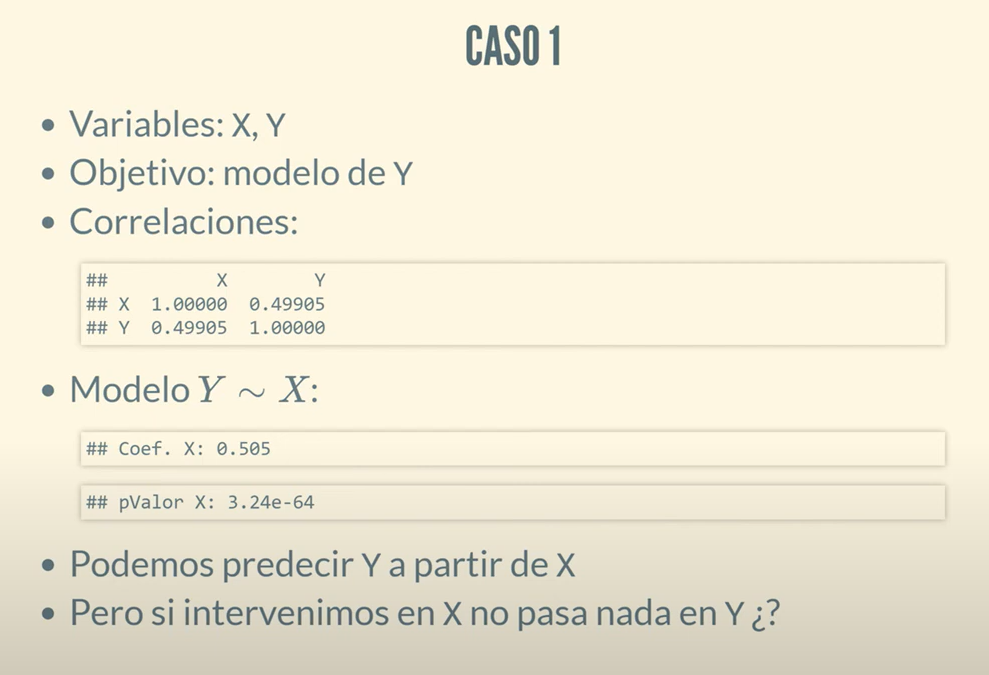

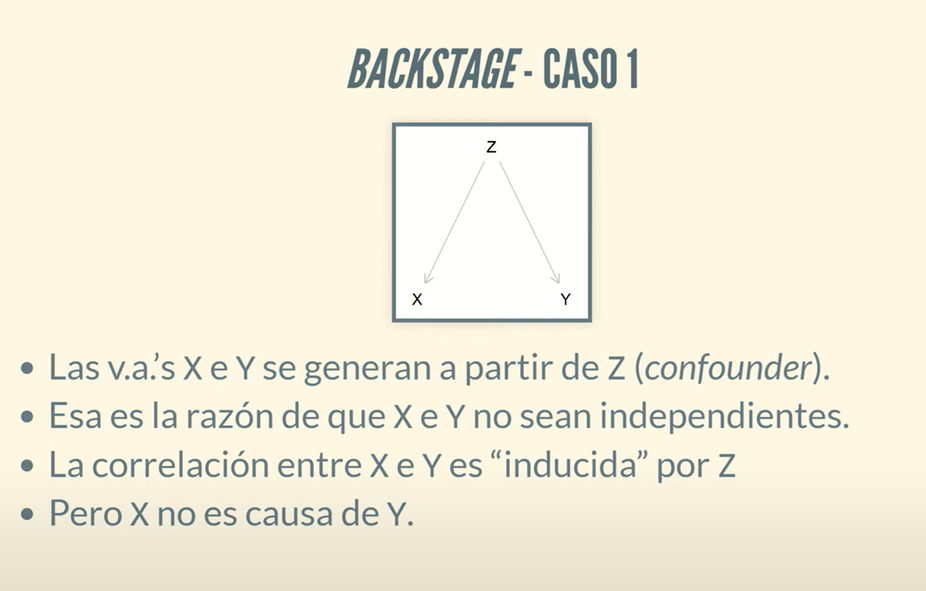

### CASO 2: Colinealidad

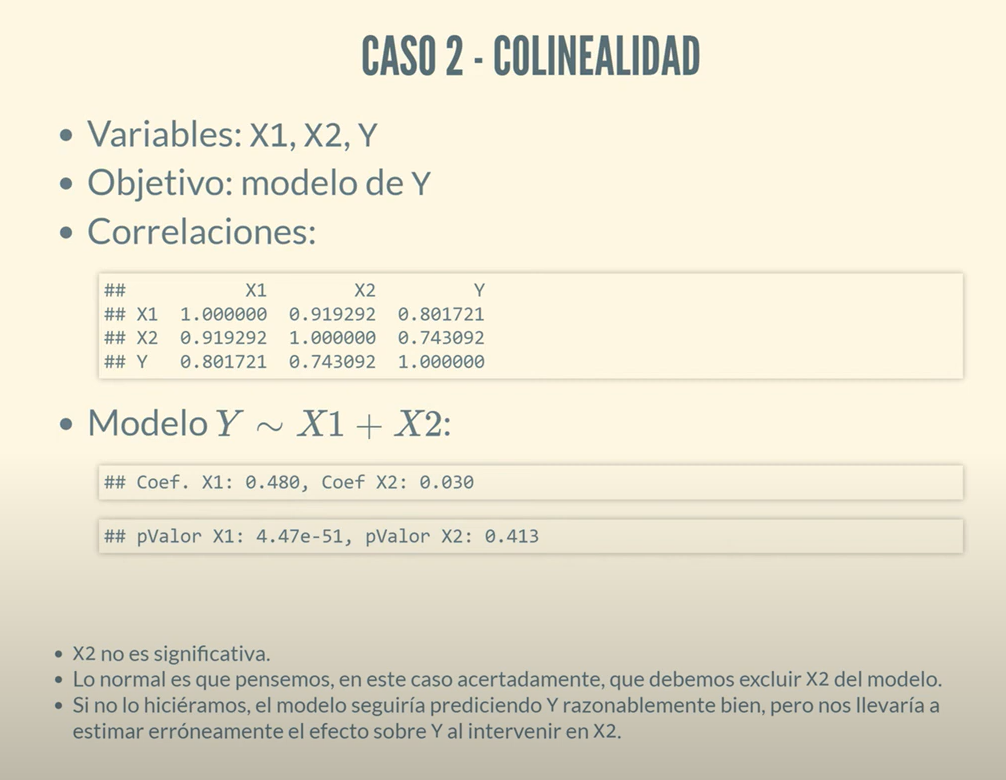

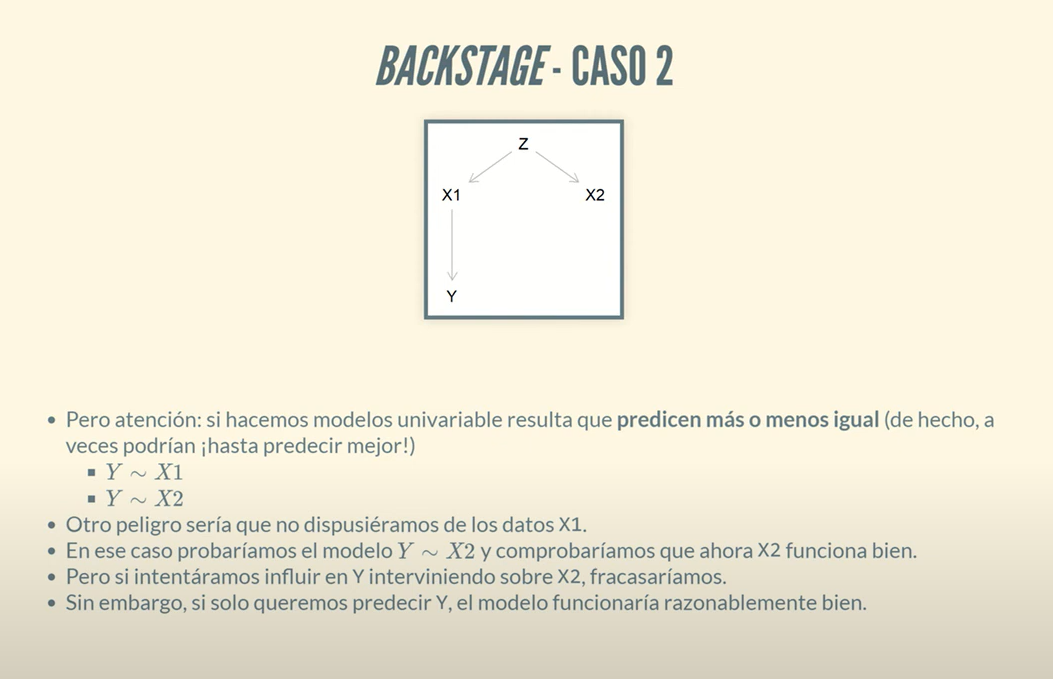

### CASO 3: Cadenas (chains)

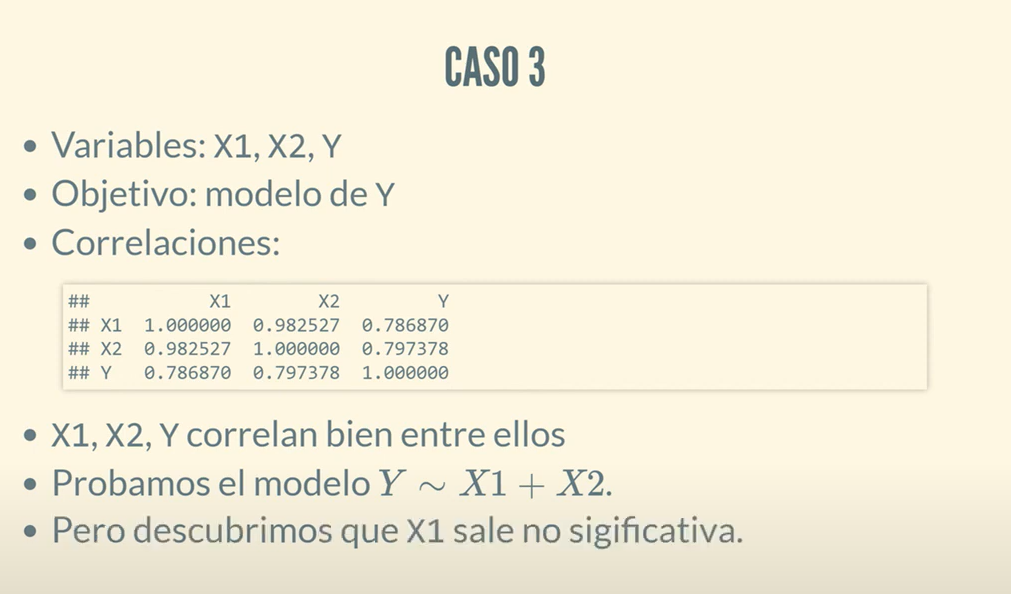

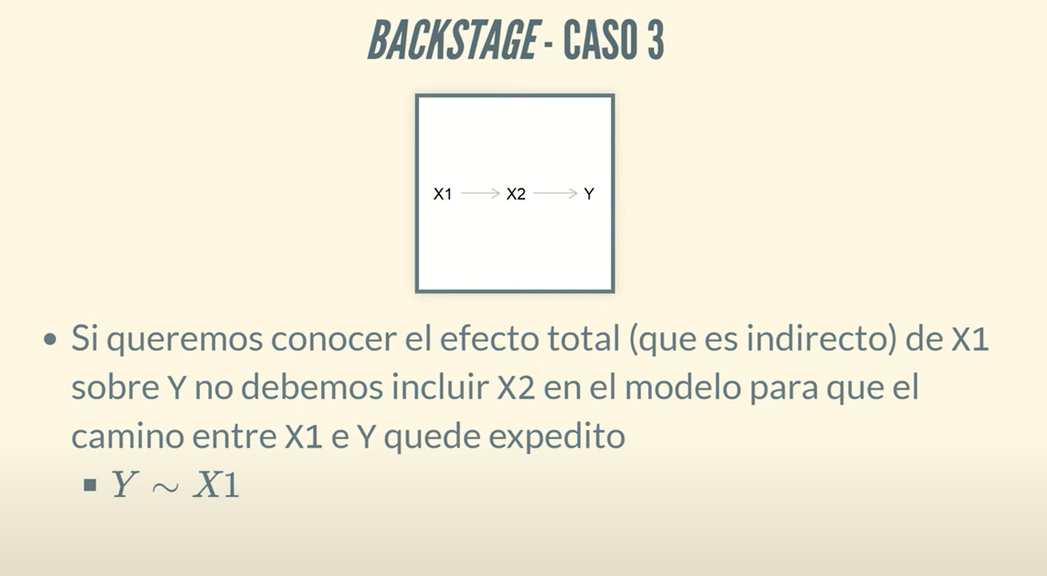



### CASO 4: Colisionadores (colaiders)

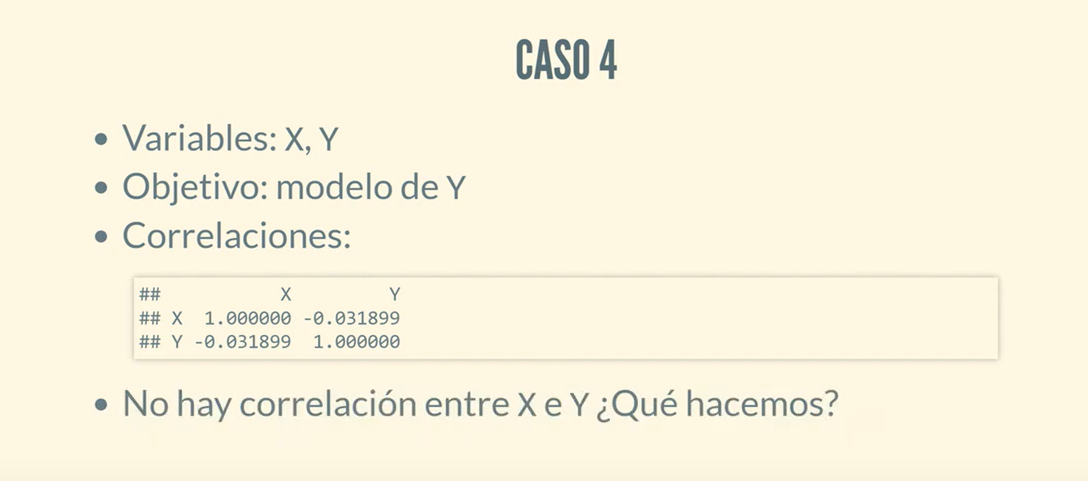

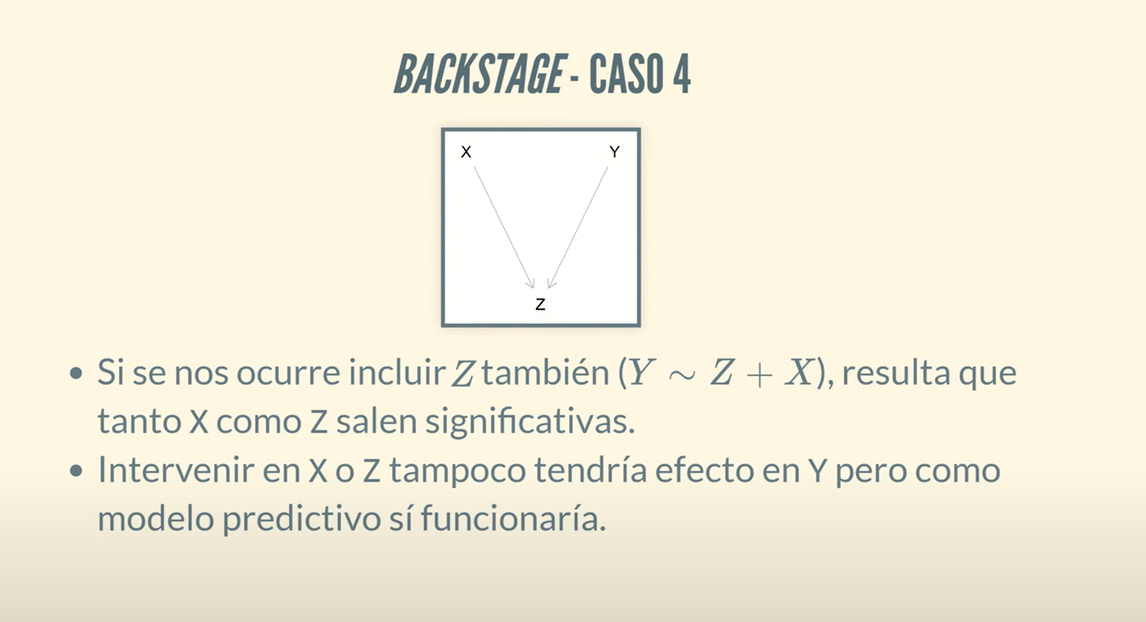

### Conclusiones

- Usar un modelo causalmente incorrecto (es decir, creado basándonos solo en las correlaciones) no es un problema a efectos meramente predictivos, como hemos visto. 

- Si lo único que queremos es predecir, no hace falta que le demos muchas vueltas al modelo. 
    - Podemos emplear la táctica machine learning - meter todas las variables, buscar el modelo que mejor prediga - y ¡a predecir!.
- Pero si es un problema desde un punto de vista inferencial - entender cómo funcionan las cosas -, ya que, a efectos explicativos, podemos terminar con una idea errónea de qué causa qué. 
    - Y esto es particularmente grave si queremos usar el modelo para intervenir.